In [1]:
import numpy as np
import pandas as pd

In [2]:
books_df = pd.read_csv('dataset/categorical/books_clean.csv')
books_df.shape

(6810, 12)

In [3]:
books_df.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [4]:
R = books_df['average_rating']
v = books_df['ratings_count']
C = books_df['average_rating'].mean()
m = books_df['ratings_count'].quantile(0.9266) # Top 500 books (6810 - 500) / 6810 = 0.9266

books_df['weighted_avg'] = (R*v + C*m) / (v + m)


In [5]:
sorted_books_ratings = books_df.sort_values('weighted_avg', ascending=False)
sorted_books_ratings.head(20)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,weighted_avg
2723,9780439785969,0439785960,Harry Potter and the Half-Blood Prince (Book 6),NaN,"Rowling, J.K.",Juvenile Fiction,http://books.google.com/books/content?id=QzI0B...,When Harry Potter and the Half-Blood Prince op...,2015.0,4.56,652.0,1944099.0,4.545892
2710,9780439655484,043965548X,Harry Potter and the Prisoner of Azkaban (Book 3),NaN,"Rowling, J.K.",Juvenile Fiction,http://books.google.com/books/content?id=IZN5B...,"For twelve long years, the dread fortress of A...",2015.0,4.55,435.0,2149872.0,4.537419
2676,9780439358071,0439358078,Harry Potter and the Order of the Phoenix (Boo...,NaN,"Rowling, J.K.",Juvenile Fiction,http://books.google.com/books/content?id=OIJ5B...,"In Harry Potter and the Order of the Phoenix, ...",2015.0,4.49,870.0,1996446.0,4.477789
1780,9780345339737,0345339738,The Fellowship of the Ring,Being the First Part of the Lord of the Rings,John Ronald Reuel Tolkien,Fantasy fiction,http://books.google.com/books/content?id=jECp6...,"In a sleepy village in the Shire, a young hobb...",2012.0,4.52,490.0,532629.0,4.474507
2698,9780439554930,0439554934,Harry Potter and the Sorcerer's Stone (Book 1),NaN,"Rowling, J.K.",Juvenile Fiction,http://books.google.com/books/content?id=9jA0B...,"In Harry Potter and the Sorcerer's Stone, Harr...",2015.0,4.47,320.0,5629932.0,4.465766
5346,9780836218053,0836218051,The Essential Calvin And Hobbes,NaN,Bill Watterson,Comics & Graphic Novels,http://books.google.com/books/content?id=JuDIn...,The Essential Calvin and Hobbes is an over-siz...,1988.0,4.64,256.0,102955.0,4.425817
2661,9780439064866,0439064864,Harry Potter and the Chamber of Secrets (Book 2),NaN,"Rowling, J.K.",Juvenile Fiction,http://books.google.com/books/content?id=ZTE0B...,"In Harry Potter and the Chamber of Secrets, th...",2015.0,4.41,341.0,2115562.0,4.400120
1937,9780345538376,0345538374,The Hobbit / The Lord of the Rings,The Hobbit / The Fellowship of the Ring / The ...,John Ronald Reuel Tolkien,Fiction,http://books.google.com/books/content?id=rW9cL...,"Presents a box set including the complete ""Lor...",2012.0,4.59,1728.0,97731.0,4.383674
3478,9780553381696,0553381695,A Clash of Kings,NaN,George R. R. Martin,Fiction,http://books.google.com/books/content?id=NnE07...,With his estate divided and his family scatter...,2002.0,4.41,969.0,599010.0,4.376847
880,9780141014081,0141014083,Complete Maus,NaN,Art Spiegelman,Children of Holocaust survivors,http://books.google.com/books/content?id=rBj-n...,Combined here are Maus I: A Survivor's Tale an...,2003.0,4.55,296.0,100212.0,4.359557


C:\Users\tanwa\AppData\Local\Temp\ipykernel_23532\2772511255.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  axis1 = sns.barplot(x=weight_avg['weighted_avg'].head(10), y=weight_avg['title'].head(10), data=weight_avg, palette='deep')


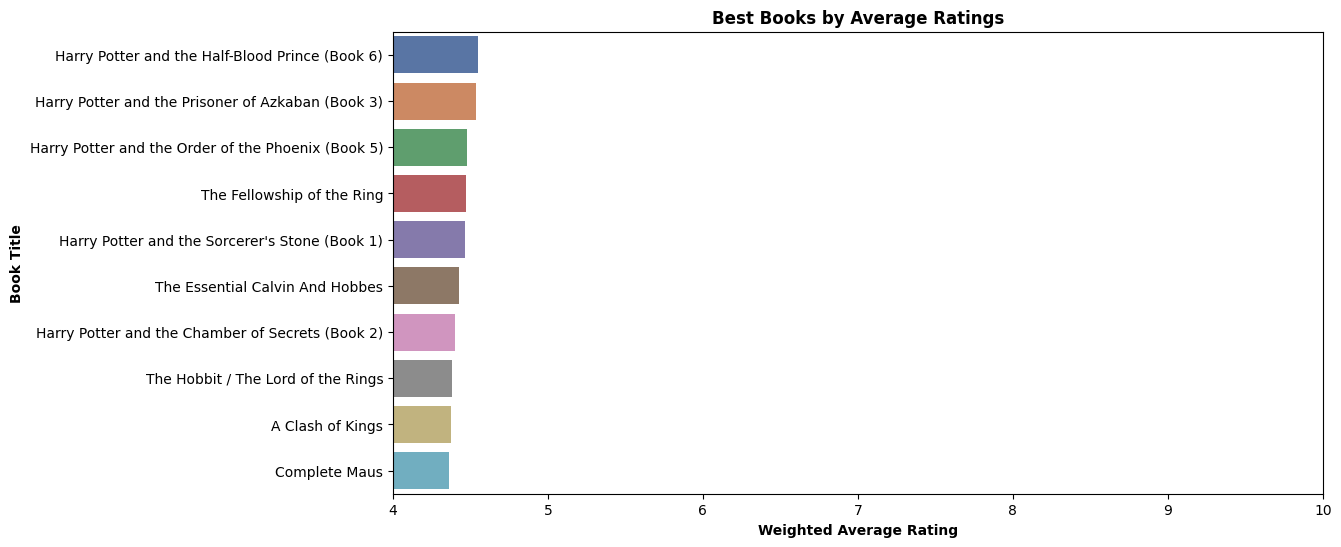

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

weight_avg = sorted_books_ratings.sort_values("weighted_avg", ascending=False)
plt.figure(figsize=(12, 6))
axis1 = sns.barplot(x=weight_avg['weighted_avg'].head(10), y=weight_avg['title'].head(10), data=weight_avg, palette='deep')
plt.xlim(4, 10)
plt.title('Best Books by Average Ratings', weight='bold')
plt.xlabel('Weighted Average Rating', weight='bold')
plt.ylabel('Book Title', weight='bold')
plt.savefig('best_books.png')

C:\Users\tanwa\AppData\Local\Temp\ipykernel_23532\972352695.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=popularity['ratings_count'].head(10), y=popularity['title'].head(10), data=popularity, palette='deep')


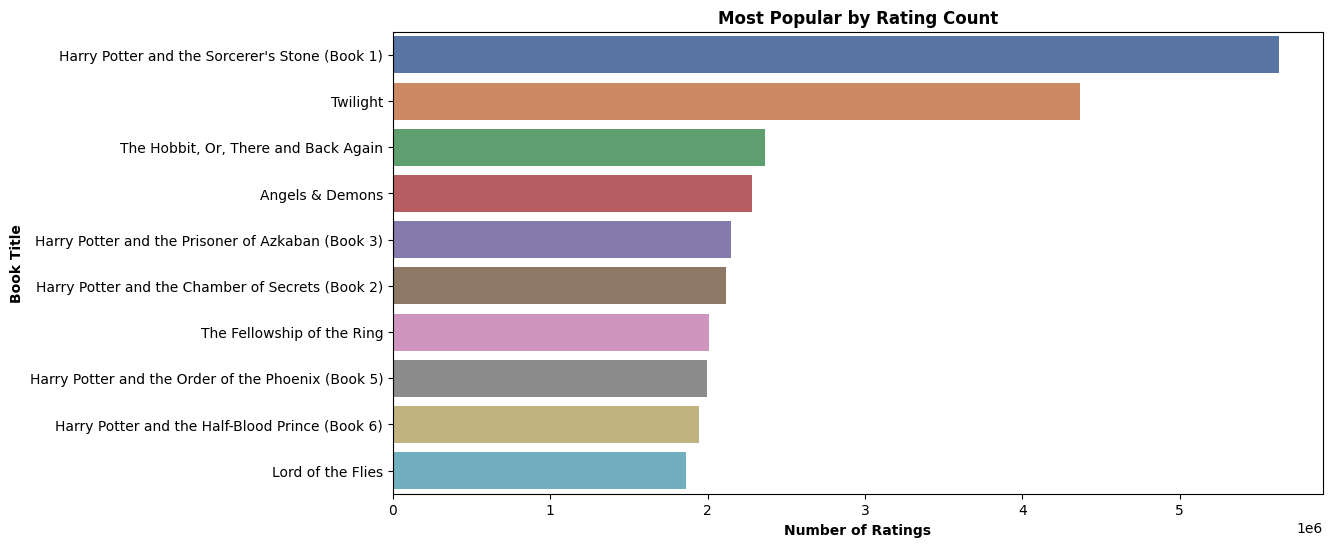

In [7]:
popularity = sorted_books_ratings.sort_values("ratings_count", ascending=False)
plt.figure(figsize=(12, 6))
ax=sns.barplot(x=popularity['ratings_count'].head(10), y=popularity['title'].head(10), data=popularity, palette='deep')

plt.title('Most Popular by Rating Count', weight='bold')
plt.xlabel('Number of Ratings', weight='bold')
plt.ylabel('Book Title', weight='bold')
plt.savefig('best_popular_books.png')

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaling = MinMaxScaler()
books_scaled_df = scaling.fit_transform(books_df[['weighted_avg', 'ratings_count']])
books_normalized_df = pd.DataFrame(books_scaled_df, columns=['weighted_avg', 'ratings_count'])
books_normalized_df.head()


,weighted_avg,ratings_count
0,0.442130,0.000064
1,0.433020,0.000917
2,0.442864,0.000031
3,0.441549,0.005246
4,0.527375,0.005983


In [9]:
books_df[['normalized_weight_avg', 'normalized_popularity']] = books_normalized_df

In [10]:
books_df['score'] = books_df['normalized_weight_avg'] * 0.5 + books_df['normalized_popularity'] * 0.5
scored_books_df = books_df.sort_values(['score'], ascending=False)
scored_books_df[['title', 'normalized_weight_avg', 'normalized_popularity', 'score']].head(20)

,title,normalized_weight_avg,normalized_popularity,score
2698,Harry Potter and the Sorcerer's Stone (Book 1),0.927112,1.000000,0.963556
2710,Harry Potter and the Prisoner of Azkaban (Book 3),0.992292,0.381865,0.687078
2723,Harry Potter and the Half-Blood Prince (Book 6),1.000000,0.345315,0.672657
2676,Harry Potter and the Order of the Phoenix (Boo...,0.938050,0.354613,0.646331
2661,Harry Potter and the Chamber of Secrets (Book 2),0.867398,0.375770,0.621584
3745,The Fellowship of the Ring,0.813545,0.356976,0.585260
3741,"The Hobbit, Or, There and Back Again",0.734414,0.420070,0.577242
1780,The Fellowship of the Ring,0.935064,0.094607,0.514835
3478,A Clash of Kings,0.846227,0.106397,0.476312
1643,Twilight,0.133634,0.775736,0.454685


C:\Users\tanwa\AppData\Local\Temp\ipykernel_23532\2154611190.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=scored_books_df['score'].head(10), y=scored_books_df['title'].head(10), data=scored_books_df, palette='deep')


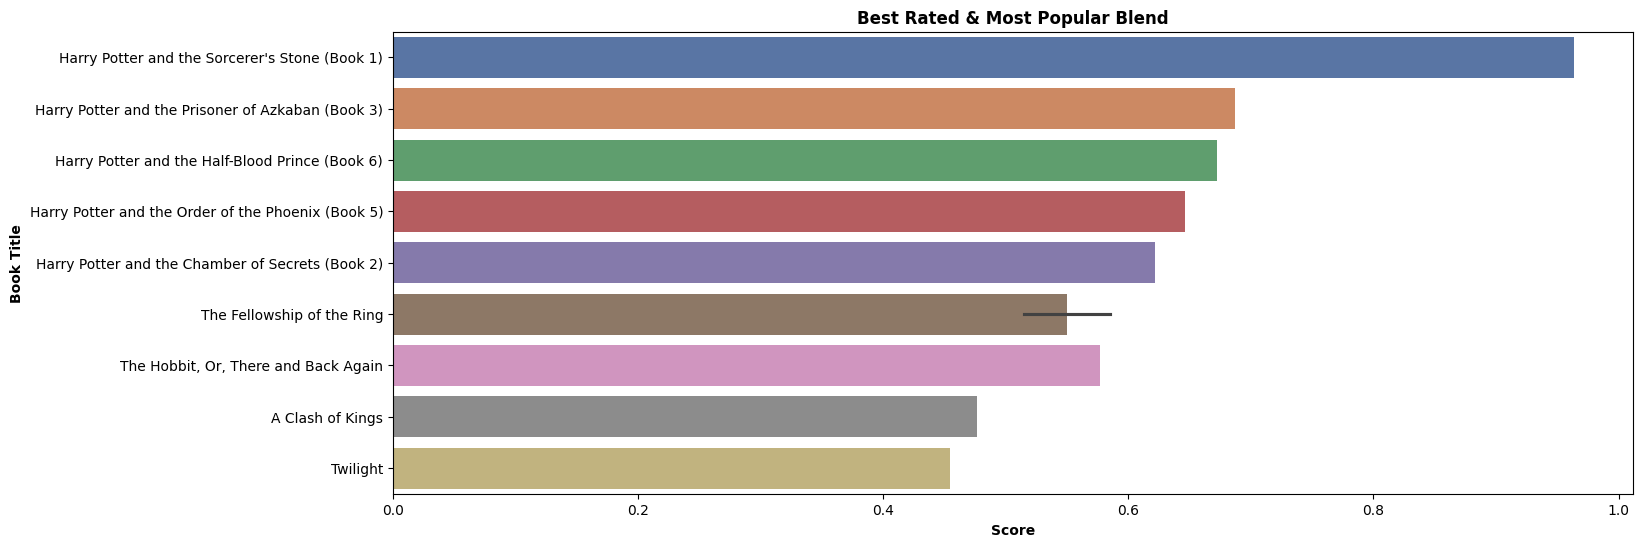

In [11]:
plt.figure(figsize=(16,6))

ax = sns.barplot(x=scored_books_df['score'].head(10), y=scored_books_df['title'].head(10), data=scored_books_df, palette='deep')

#plt.xlim(3.55, 5.25)
plt.title('Best Rated & Most Popular Blend', weight='bold')
plt.xlabel('Score', weight='bold')
plt.ylabel('Book Title', weight='bold')

plt.savefig('scored_books.png')